In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PythonScripts import wrangle
from scipy import stats
import datetime

# Questions for Thursdays Meeting 
### Desiree McElroy , Xavier Carter (Jul, 2021)
- Questions asked of us to find for the meeting on Thursday are as followed.
    * Which lesson appears to attract the most traffic consistently across cohorts (per program)?
    * Which lessons are least accessed?
    * Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
    * What topics are grads continuing to access after graduation?
    * at some point in 2019 the ability for students to access both curriculums was deprecated, do you see evidence of that happening, did it happen before?
    * Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over?

## Wrangle Data

In [2]:
df = wrangle.get_curriculum_log()
df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2018-01-26,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP
2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP
2018-01-26,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,PHP


In [3]:
df.shape

(954312, 11)

In [4]:
df.isnull().sum()

endpoint        0
user_id         0
cohort_id       0
source_ip       0
name            0
start_date      0
end_date        0
created_at      0
updated_at      0
program_id      0
program_name    0
dtype: int64

## Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [5]:
# take a look at the value counts for program name
df.program_name.value_counts()

Java            791196
Data Science    122001
PHP              41110
Front End            5
Name: program_name, dtype: int64

In [6]:
df.program_id.value_counts()

2    791196
3    122001
1     41110
4         5
Name: program_id, dtype: int64

In [7]:
#take a look at endpoint values per PHP
df[df.program_name=='PHP'].endpoint.value_counts().head(3)

/               1869
javascript-i    1144
index.html      1011
Name: endpoint, dtype: int64

In [8]:
# take a look at endpoint values per Java
df[df.program_name=='Java'].endpoint.value_counts().head(3)

/               38763
javascript-i    19280
toc             19221
Name: endpoint, dtype: int64

In [9]:
# take a look at endpoint values per Data Science
df[df.program_name=='Data Science'].endpoint.value_counts().head(3)

/                           9866
search/search_index.json    2950
classification/overview     2455
Name: endpoint, dtype: int64

In [10]:
# take a look at endpoint values per Front End
df[df.program_name=='Front End'].endpoint.value_counts().head(3)

content/html-css                               2
content/html-css/introduction.html             1
content/html-css/gitbook/images/favicon.ico    1
Name: endpoint, dtype: int64

### The programs are most attracted to lessons as follows:
- PHP (1) most visited: Java
- Java (2) most visited: Javascipt
- Data Science (3) most visited: Classification Overview
- Front End (4) most visited: HTML CSS

## Which lessons are least accessed?

In [11]:
#take a look at the value counts of each endpoint site
df.endpoint.value_counts()

/                              50499
javascript-i                   20434
search/search_index.json       20220
toc                            19632
html-css                       14772
                               ...  
extra-challenges/mars-rover        1
00_                                1
extra-features                     1
modeling-lesson1                   1
javascript-i/math                  1
Name: endpoint, Length: 2315, dtype: int64

In [12]:
# look at the bottom of the list of visited endpoints

# looking at the bottom five sites for more than 2 visits
(df.endpoint.value_counts(ascending=True)>2).index.tolist()[:5]

['javascript-i/math',
 '9.4_Detecting_TimeSeries_Anomalies',
 '4-stats/2.4-power-analysis',
 'further-reading/spring/pagination',
 'appendix/testing-code.md']

In [13]:
# make it into a dataframe for coding purposes
endpoints = pd.DataFrame(df.endpoint.value_counts())
endpoints

,endpoint
/,50499
javascript-i,20434
search/search_index.json,20220
toc,19632
html-css,14772
...,...
extra-challenges/mars-rover,1
00_,1
extra-features,1
modeling-lesson1,1


In [14]:
# use function to see what the bounds are for sites visited
wrangle.get_lower_and_upper_bounds(endpoints, k=1.5)

------------------------------------------------------
For endpoint the lower bound is -127.0 and  upper bound is 217.0

                                                    endpoint
/                                                      50499
javascript-i                                           20434
search/search_index.json                               20220
toc                                                    19632
html-css                                               14772
...                                                      ...
sql/clauses-overview                                     219
10-anomaly-detection/3-discrete-probabilistic-m...       219
3.0-mysql-overview                                       219
2-storytelling/2.2-create                                219
individual-project/individual-project                    218

[439 rows x 1 columns] 




- This function tells us 217 or more visits are legitimate visits.
- Anything below 217 is likely noise, accidental clicks etc..
- We can isolate the bottom part of the list for more than 217 visits.

In [15]:
# pull the bottom visited sites filtering by more than 217 visits
df.endpoint.value_counts().reset_index(name='count').query('count > 217')['index'].tolist()[-6:]

['8-clustering/5.1-kmeans-part-1',
 'sql/clauses-overview',
 '10-anomaly-detection/3-discrete-probabilistic-methods',
 '3.0-mysql-overview',
 '2-storytelling/2.2-create',
 'individual-project/individual-project']

### Takeaways:
- Most of the lower visited sites are all data science sites.
- This makes sense because there are less data science students and it is a newer program.

## Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [16]:
# isolate the rows that were created during the student's active time
curr_df = df[df.start_date>=df.index]
curr_df = curr_df[curr_df.index<=curr_df.end_date]

curr_df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2018-03-05,html-css/css-i,25,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2,Java
2018-03-05,html-css/forms,25,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2,Java
2018-03-05,html-css/css-i,25,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2,Java
2018-03-05,html-css/css-i/introduction,25,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2,Java
2018-03-05,html-css,25,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2,Java


In [17]:
user_df = pd.DataFrame(curr_df.groupby('user_id')['endpoint'].count())
user_df.head()

,endpoint
user_id,
25,15
116,10
117,6
118,7
119,6


In [18]:
# evaluate endpoint counts
user_df[user_df.endpoint>1]

,endpoint
user_id,
25,15
116,10
117,6
118,7
119,6
...,...
974,8
976,4
977,10


- But again what is the sweet spot? Is there excess noise in the dataframe?
- There are a lot of users with only 1 endpoint, this seems like it may be an anomaly

In [19]:
# take a look at the statistics of my dataframe
user_df.describe()

,endpoint
count,431.000000
mean,6.524362
std,6.627198
min,1.000000
25%,2.000000
50%,4.000000
75%,9.000000
max,52.000000


In [20]:
# get list of users that have endpoints from 20 to 22 since this is considered the lower end of average
user_list = user_df[(user_df.endpoint>=20) & (user_df.endpoint<=22)].index.to_list()
user_list

[187, 218, 234, 302, 325, 490, 555, 691]

In [21]:
# take a quick snap shop of one of the users from the list
curr_df[curr_df.user_id==187]

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2018-05-29,/,187,24.0,97.105.19.61,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/01-intro,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/02-listing-files,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/03-file-paths,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/01-intro,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/02-listing-files,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java


In [22]:
#create a for loop to get the whole information about the least accessed endpoint
user_df= pd.DataFrame()
for i in user_list:
    x =curr_df[curr_df['user_id'] == i]
    user_df= pd.concat([user_df, x], ignore_index = False)

In [23]:
# take a look at our dataframe of users with the low end of average endpoints
user_df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2018-05-29,/,187,24.0,97.105.19.61,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/01-intro,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java
2018-05-29,prework/cli/02-listing-files,187,24.0,45.31.213.223,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2,Java


In [24]:
# explore df
user_df.program_name.value_counts()

Java            148
Data Science     20
Name: program_name, dtype: int64

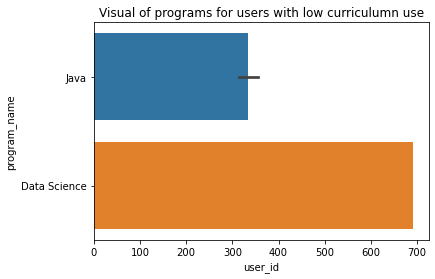

In [25]:
# visualize the programs amongst these users
sns.barplot(x='user_id', y='program_name', data=user_df)
plt.title('Visual of programs for users with low curriculumn use');

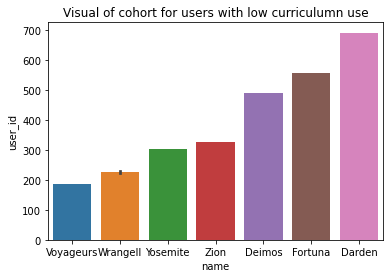

In [26]:
# visualize the programs amongst these users
sns.barplot(y='user_id', x='name', data=user_df)
plt.title('Visual of cohort for users with low curriculumn use');

In [27]:
# a couple of users appear to have multiple ip addresses so that is worth looking into
user_df.groupby('user_id')['source_ip'].value_counts()

user_id  source_ip    
187      45.31.213.223    20
         97.105.19.61      1
218      97.105.19.58     20
234      97.105.19.58     21
302      97.105.19.58     21
325      97.105.19.58     21
490      70.121.205.5     17
         97.105.19.58      5
555      136.50.32.151    20
         97.105.19.58      2
691      66.69.83.140     20
Name: source_ip, dtype: int64

### Takeaways:
- There is not any major takeaways as far as cohort.
- The users are majority made up of data science and java students.
- Despite a lot of the students being data science, the majority of the websites visits are not related to data science at all.

## What topics are grads continuing to access after graduation?
- We'll look into when a user accessed the website after their graduation to see what they look at post graduation

In [28]:
df.loc[(df.program_name == 'Data Science') & (df.index > df.end_date)].endpoint.value_counts()[2:].head(10)

classification/overview                                          368
sql/mysql-overview                                               343
classification/scale_features_or_not.svg                         325
anomaly-detection/AnomalyDetectionCartoon.jpeg                   226
anomaly-detection/overview                                       225
fundamentals/AI-ML-DL-timeline.jpg                               223
fundamentals/modern-data-scientist.jpg                           221
fundamentals/intro-to-data-science                               217
classification/classical_programming_vs_machine_learning.jpeg    187
1-fundamentals/modern-data-scientist.jpg                         130
Name: endpoint, dtype: int64

In [29]:
df.loc[(df.program_name == 'PHP') & (df.index > df.end_date)].endpoint.value_counts()[1:].head(20)

javascript-i                                                                 1144
index.html                                                                   1011
html-css                                                                      979
javascript-i/javascript-with-html                                             832
javascript-i/introduction/working-with-data-types-operators-and-variables     612
jquery                                                                        561
javascript-ii                                                                 530
spring                                                                        529
java-iii                                                                      508
java-i                                                                        485
javascript-i/functions                                                        484
java-ii                                                                       480
javascript-i/int

In [30]:
df.loc[(df.program_name == 'Java') & (df.updated_at > df.end_date)].endpoint.value_counts()[2:].head(20)

javascript-i                                2792
spring                                      2289
html-css                                    2247
java-iii                                    2219
java-ii                                     2093
toc                                         1934
appendix                                    1827
javascript-ii                               1599
java-i                                      1577
jquery                                      1564
mysql                                       1495
jquery/ajax/weather-map                     1292
classification/overview                     1160
sql/mysql-overview                          1066
classification/scale_features_or_not.svg    1028
spring/fundamentals/repositories            1025
java-iii/servlets                            965
spring/fundamentals/views                    899
java-iii/jsp-and-jstl                        839
mysql/tables                                 809
Name: endpoint, dtyp

In [31]:
df.loc[(df.program_name == 'Front End') & (df.updated_at > df.end_date)].endpoint.value_counts().head(10)

content/html-css                               2
content/html-css/introduction.html             1
content/html-css/gitbook/images/favicon.ico    1
/                                              1
Name: endpoint, dtype: int64

### Takeaways 
- Seems like the Data Science Students tend to brush up on there Anomoly Detection as well as classification methods fromt the beginning of the course
- Java and PHP Have a similar role in providing students to information accessed at the begiining of the course, most likely revisiting core concepts?

## At some point in 2019 the ability for students to access both curriculums was deprecated, do you see evidence of that happening, did it happen before?

In [32]:
##classes in 2020 and greater can only access their specific curriculum, we can use data after 2019 to pinpoint just exactly what student had access to  what 
java_list = df[(df['program_name'] == 'Java') & (df.created_at.dt.year > 2019)].endpoint.unique().tolist()

ds_list = df[(df['program_name'] == 'Data Science') & (df.created_at.dt.year > 2019)].endpoint.unique().tolist()

In [33]:
#look at common pages visited for both programs to ommit when filtering 
common_list = []
for j in java_list:
    for d in ds_list:
        if j == d:
            common_list.append(j)

In [34]:
#data science students who accessed the webdev cirrculum before the switch in 2019
ds_in_web = df.loc[(df['program_name'] == 'Data Science') & (df['endpoint'].isin(java_list)) & (~df['endpoint'].isin(common_list))]

In [35]:
#Web students who accessed the data science cirrculum before the switch in 2019
web_in_ds = df.loc[(df['program_name'] == 'Java') & (df['endpoint'].isin(ds_list)) & (~df['endpoint'].isin(common_list))]

In [36]:
ds_in_web.sample(5)

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2019-09-27,html-css/elements,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3,Data Science
2019-09-25,html-css,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3,Data Science
2019-11-25,javascript-ii,476,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3,Data Science
2019-12-03,jquery,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3,Data Science
2019-11-26,java-i,476,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3,Data Science


In [37]:
web_in_ds.sample(5)

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,
2020-10-01,classification/overview,248,28.0,173.173.115.201,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,Java
2020-11-19,fundamentals/pipeline-demo,11,28.0,76.185.145.231,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,Java
2019-10-16,6-regression/2.0-acquire-and-prep,11,28.0,97.105.19.58,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,Java
2020-01-30,1-fundamentals/1.2-data-science-pipeline,248,28.0,97.105.19.58,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,Java
2020-04-21,10-anomaly-detection/1-overview,11,28.0,76.185.131.226,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,Java


#### Is there evidence that this is still happening after 2019?

In [38]:
ds_in_web[ds_in_web['created_at'].dt.year > 2019]

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,


In [39]:
web_in_ds[web_in_ds['created_at'].dt.year > 2019]

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id,program_name
date,,,,,,,,,,,


### Takeaways
- Although students were able to access the others curriculum prior to 2019, it doesnt seem to be an issue that happens from what can be seen in the dataset.

## Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over?

#### We Will look at Java Students first.

- If the cohort number of page visits exceeds one standard deviation from the average number of page visits, you can argue that that particular cohort accesses the data more or less than there fellow cohorts.

In [51]:
#Top 10 Most popular endpoints for java students
java_df = df[(df['program_name'] == 'Java') & (~df['endpoint'].isin(common_list))].endpoint.value_counts().to_frame().reset_index().head(10)

In [52]:
#create a list of those top 10 endpoints
list_of_endpoints = java_df['index'].tolist()
#create a list of cohorts for java students
list_of_cohorts = df[df['program_name'] == 'Java'].name.unique().tolist()

In [53]:
#create a dataframe of the how many times the website was accessed by every cohort individually
java_df = df[(df['name'].isin(list_of_cohorts)) & (df['endpoint'].isin(list_of_endpoints))].groupby(['name','endpoint']).count()
java_df = java_df.reset_index().rename(columns=({'user_id':'counts'}))
java_df = java_df[['name','endpoint','counts']]

In [54]:
#avg page visits for each endpoint
mean_for_java = java_df.groupby('endpoint').counts.mean().to_frame().reset_index().rename(columns=({'counts':'avg'}))
#standard deviation for each endpoint
std_for_java = java_df.groupby('endpoint').counts.std().to_frame().reset_index().rename(columns=({'counts':'stds'}))

In [55]:
#show who visits what end point more than others, if you fall 1 standard deviation above or below the avg,
# we can consider the cohort to access the data more than there fellow cohorts.
for i in list_of_endpoints:
    endpoint_mean = mean_for_java[mean_for_java['endpoint'] == i].avg[mean_for_java[mean_for_java['endpoint'] == i].index[0]]
    endpoint_std = std_for_java[std_for_java['endpoint'] == i].stds[std_for_java[std_for_java['endpoint'] == i].index[0]]
    
    print('Cohorts who accessed the {} lesson more than the other cohorts'.format(i))
    print(java_df[(java_df['endpoint'] == i) & (java_df['counts'] > (endpoint_mean + endpoint_std))].name)
    print('Cohorts who accessed the {} lesson less than the other cohorts'.format(i))
    print(java_df[(java_df['endpoint'] == i) & (java_df['counts'] < (endpoint_mean - endpoint_std))].name)

Cohorts who accessed the javascript-i lesson more than the other cohorts
203    Staff
Name: name, dtype: object
Cohorts who accessed the java-iii lesson more than the other cohorts
103    Jupiter
202      Staff
Name: name, dtype: object
Cohorts who accessed the html-css lesson more than the other cohorts
100    Jupiter
199      Staff
Name: name, dtype: object
Cohorts who accessed the java-ii lesson more than the other cohorts
102    Jupiter
201      Staff
Name: name, dtype: object
Cohorts who accessed the jquery lesson more than the other cohorts
207    Staff
Name: name, dtype: object
Cohorts who accessed the java-i lesson more than the other cohorts
200        Staff
230    Voyageurs
Name: name, dtype: object
Cohorts who accessed the javascript-ii lesson more than the other cohorts
206    Staff
276     Zion
Name: name, dtype: object
Cohorts who accessed the mysql/tables lesson more than the other cohorts
109      Jupiter
208        Staff
238    Voyageurs
Name: name, dtype: object
Cohor

#### We'll use the same process for Data Science Students
- If the cohort number of page visits exceeds one standard deviation from the average number of page visits, you can argue that that particular cohort accesses the data more or less than there fellow cohorts.

In [45]:
#Top 10 Most popular endpoints for DS students
ds_df = df[(df['program_name'] == 'Data Science') & (~df['endpoint'].isin(common_list))].endpoint.value_counts().to_frame().reset_index().head(10)

In [46]:
#create a list of those top 10 endpoints
list_of_endpoints = ds_df['index'].tolist()
#create a list of cohorts for java students
list_of_cohorts = df[df['program_name'] == 'Data Science'].name.unique().tolist()

In [47]:
#create a dataframe of the how many times the website was accessed by every cohort individually
ds_df = df[(df['name'].isin(list_of_cohorts)) & (df['endpoint'].isin(list_of_endpoints))].groupby(['name','endpoint']).count()
ds_df = ds_df.reset_index().rename(columns=({'user_id':'counts'}))
ds_df = ds_df[['name','endpoint','counts']]

In [48]:
#avg page visits for each endpoint
mean_for_ds = ds_df.groupby('endpoint').counts.mean().to_frame().reset_index().rename(columns=({'counts':'avg'}))
#standard deviation for each endpoint
std_for_ds = ds_df.groupby('endpoint').counts.std().to_frame().reset_index().rename(columns=({'counts':'stds'}))

In [49]:
#show who visits what end point more than others
for i in list_of_endpoints:
    endpoint_mean = mean_for_ds[mean_for_ds['endpoint'] == i].avg[mean_for_ds[mean_for_ds['endpoint'] == i].index[0]]
    endpoint_std = std_for_ds[std_for_ds['endpoint'] == i].stds[std_for_ds[std_for_ds['endpoint'] == i].index[0]]
    
    print('Cohorts who accessed the {} lesson more than the other cohorts'.format(i))
    print(ds_df[(ds_df['endpoint'] == i) & (ds_df['counts'] > (endpoint_mean + endpoint_std))].name)
    print('Cohorts who accessed the {} lesson less than the other cohorts'.format(i))
    print(ds_df[(ds_df['endpoint'] == i) & (ds_df['counts'] < (endpoint_mean - endpoint_std))].name)

Cohorts who accessed the classification/overview lesson more than the other cohorts
27    Darden
Name: name, dtype: object
Cohorts who accessed the classification/overview lesson less than the other cohorts
7    Bayes
Name: name, dtype: object
Cohorts who accessed the classification/scale_features_or_not.svg lesson more than the other cohorts
28    Darden
Name: name, dtype: object
Cohorts who accessed the classification/scale_features_or_not.svg lesson less than the other cohorts
8    Bayes
Name: name, dtype: object
Cohorts who accessed the 1-fundamentals/modern-data-scientist.jpg lesson more than the other cohorts
2    Bayes
Name: name, dtype: object
Cohorts who accessed the 1-fundamentals/modern-data-scientist.jpg lesson less than the other cohorts
32    Easley
Name: name, dtype: object
Cohorts who accessed the 1-fundamentals/AI-ML-DL-timeline.jpg lesson more than the other cohorts
1    Bayes
Name: name, dtype: object
Cohorts who accessed the 1-fundamentals/AI-ML-DL-timeline.jpg less

### Takeaways 
- For Data Science Students, Bayes seemed to look at the curriculum way more in retrospect, followed by Darden. But due to there inactivity with the website seen above, there might be more to look into. (possible data scrapping happening?)
- For Java Students, after ommiting staff, Jupiter, Voyagers and Zion Accessed the website more than their fellow java cohorts.